In [3]:
import os
import numpy as np
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split


In [4]:
def load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES):
    images = []
    labels = []
    
    # loop through category folders
    for category in range(NUM_CATEGORIES):
        category_dir = os.path.join(data_dir, str(category))
        print(f"Loading images from {category_dir}") 
        #loop through and load the images from each folder into the np array
        for filename in os.listdir(category_dir):
            
            if filename.endswith(".ppm") or filename.endswith(".jpg"):
                
                # read image, cv2 does a lot of the heavy lifting for us
                img_path = os.path.join(category_dir, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                
                # add image and label to the lists
                images.append(img) 
                labels.append(category)
    

    return np.array(images), np.array(labels)
    


['.DS_Store', '0', '1', '2']
Loading images from gtsrb-small/0
Loading images from gtsrb-small/1
Loading images from gtsrb-small/2
images.shape=(840, 30, 30, 3), labels.shape=(840,)


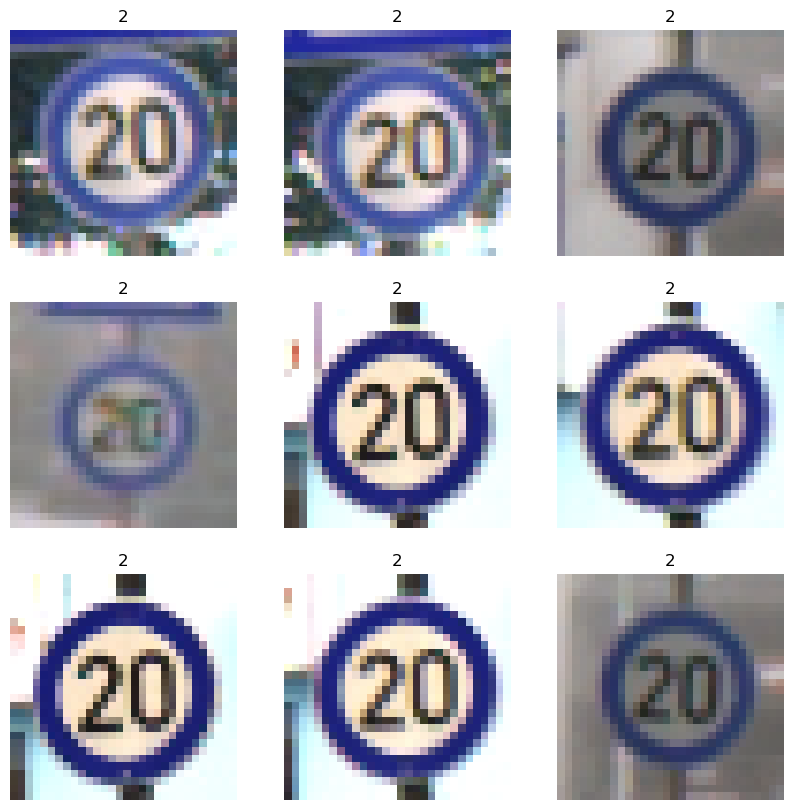

In [37]:
data_dir = "gtsrb-small"
IMG_HEIGHT = 30
IMG_WIDTH = 30
NUM_CATEGORIES = 3

print(os.listdir(data_dir))
images, labels = load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES)
print(f"images.shape={images.shape}, labels.shape={labels.shape}")

# show some example images, take random sample
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i+820])
    plt.title(labels[i+820])
    plt.axis("off")
    
# why is this onyl showing blue signs lol

In [6]:
# flatten the images
reshaped_images = images.reshape(images.shape[0], -1)
print(reshaped_images.shape)

(840, 2700)


In [7]:
# slit into 60% training and 40% remaining
X_train, X_temp, y_train, y_temp = train_test_split(reshaped_images, labels, test_size=0.4, random_state=42, stratify=labels)

# split the remaining 40% into 20% validation and 20% testing
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"X_train.shape={X_train.shape}, X_test.shape={X_test.shape}, X_val.shape={X_val.shape}"),

X_train.shape=(504, 2700), X_test.shape=(168, 2700), X_val.shape=(168, 2700)


(None,)

In [30]:
# each row now has 2700 "pixels" in its domain. 30*30*3 

X_train[0].shape=(2700,)
